## Data Science 100 Group project: an analysis of Minecraft players demographics

#### Members: Lori Tomkowicz (59247429), Yan Fung (46512463), Naomi Small (44413821), Trevor Fowler (77492379)

In this data analysis project, our group will be working with a player demographic data set from a computer science group at UBC. This independent group is interested in understanding how people play video games, and have set up a server running MineCraft and are recording play sessions. This data analysis project differs from those in previous years, as it deals with real, new data that has not been analyzed yet. This data is not a mock-up, and as such, it is unknown what potential relationships between variables are, and if there are relationships at all. The group that collects this data also has a set of new questions they would like answered, one of which we will attempt to answer in this data analysis project. In this data analysis, we will attempt to determine which "kinds" of players (based on gender, age, and experience demographics) are most likely play the game and contribute to data collection, both in quality and quantity.

In [2]:
library(tidyverse)
library(tidymodels)
library(repr)
library(gridExtra)
library(GGally)
library(scales)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

#### Preliminary Dataset Exploration

Before any predictive analysis of modeling takes place, the dataset that will be used must first be explored. Of the two dataframes collected by the group, only one will be used to answer the question. This is the `player.csv` dataframe, which contains information related to player demographics, and the amount of time spent playing Minecraft. The other dataframe provided, `sessions.csv`, contains only player email hashes and the time windows in which the players were conected to the Minecraft server. This data frame would not contribute useful information that can be used to answer our question. 

The dataframe we will be using in this analysis focuses on players' characteristics and identities. Specifically, it contains variables related to skill level (five categories, data type = chr), age (data type = int), gender (any number of categories, data type = chr), and subscription status (data type = lgl), which indicates whether or not a player has subscribed to PlaiCraft, the name given to this research project. It also contains the number of hours contributed by each player, the players name, as well as a hashed email identification, but these arent as important for our particular question. The file for player data contains 196 observations, and 9 varibales. However, two of those variables are entirly blank (the last two columns, Iidividual ID and organization name). Experience, hashedEmail, name, and gender are all character types, while played hours and age are dbl types. Lastly, subscribe, individualID, and organizationName are logical. In terms of usefulness to our analysis, the player names won't be particularly usefull, nor their email, as this probably isn't going to help predict age, gender, and experience demographics of the players who will contribute the most data. Hashed email, individual ID, and organization name are not going to be useful for this question.

In [3]:
options(repr.matrix.max.rows = 10)
url_player <- "https://raw.githubusercontent.com/LoriTomkowicz/DSCI_individual_proposal_files/refs/heads/main/players_data.csv"
player_data <- read_csv(url_player)
player_data

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17,NA,NA
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22,NA,NA
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA


#### Exploring Outcome Variables

For determining what kind of players will be willing to play the game at all, the outcome variable will be based on the existing variable played_hours. While played_hours is a numerical variable, but values can be sorted into categorical one, participation, to function as a classification outcome variable. 

For classification, the numerical values will be grouped into two classes, people willing to play the game, and people who dont want to participate. This means there will end up being only two values for this variable. Players with played_hours equal to 0.0 hours are grouped as unwilling to play the game, and players with hours greater than 0.0 hours are grouped as willing to play the game. There are a total of 85 participants who were unwilling and had zero hours logged, and 111 participants who had greater than zero hours logged. 

For determining what how many hours a particular person will contribute based on demographic, the varible played_hours will also be the response variable, but will remain numerical; this will use some type of regression. For this problem, the variable has 43 unique values for how many hours a player contributed. The number of observations in each value can be found in the third table below this cell. The majority of players played a total of 2 hours or less.

In [4]:
player_demographics <- player_data |>
select(experience, played_hours, gender, age)
player_demographics2 <- player_demographics |>
mutate(participation = case_when(played_hours > 0.0 ~ "willing",
                                played_hours == 0.0 ~ "unwilling"))
player_demographics2

participation_count <- player_demographics2 |>
select(participation) |>
group_by(participation) |>
count()
participation_count

played_hours_count <- player_demographics2 |>
select(played_hours) |>
group_by(played_hours) |>
filter(played_hours != 0.0) |>
count()
played_hours_count

experience,played_hours,gender,age,participation
<chr>,<dbl>,<chr>,<dbl>,<chr>
Pro,30.3,Male,9,willing
Veteran,3.8,Male,17,willing
Veteran,0.0,Male,17,unwilling
Amateur,0.7,Female,21,willing
Regular,0.1,Male,21,willing
⋮,⋮,⋮,⋮,⋮
Amateur,0.0,Female,17,unwilling
Veteran,0.3,Male,22,willing
Amateur,0.0,Prefer not to say,17,unwilling


participation,n
<chr>,<int>
unwilling,85
willing,111


played_hours,n
<dbl>,<int>
0.1,34
0.2,10
0.3,5
0.4,5
0.5,4
⋮,⋮
56.1,1
150.0,1
178.2,1


#### Visualization

For the classification outcome variable, participation, we plotted several graphs of player identity variables over willingness to participate. The first set of Histogram plots is that of player gender count against willingness or unwillingness ot participate. In the case of female and male players, there are more players or each of these genders willing to participate in gameplay (at least to some extent) than not. Male had the most players willing to participate, but also the most unwilling players. This is due to the fact that male players make up the largest percentage of player gender identity. Non-binary players, two-spirited players, and players who prefer not to answer, had more unwilling players than willing, though not by a lot. These demographics also had considerably fewer players in general than male or female players. Given that in the individual portion of the project, a non-binary player was found to have the second highest logged hours (and willing players of the other two identities had pretty average logged hours), the lack of players of these gender demographics may not be due to dislike for the game. The lack of players in general, and the unwillingness to play, for these gender identities may be due to a lack of inclusivity in the gaming community. Agender had equal ammounts of willing and unwilling players; there was only a single player who specified "other", and they were willing to play. However, these two gender identities had extremeley few observations, and so this distribution may not give us accurate information on their willingness or unwillingness to participate in gemeplay. 

Warning message in geom_histogram(position = "identity", stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


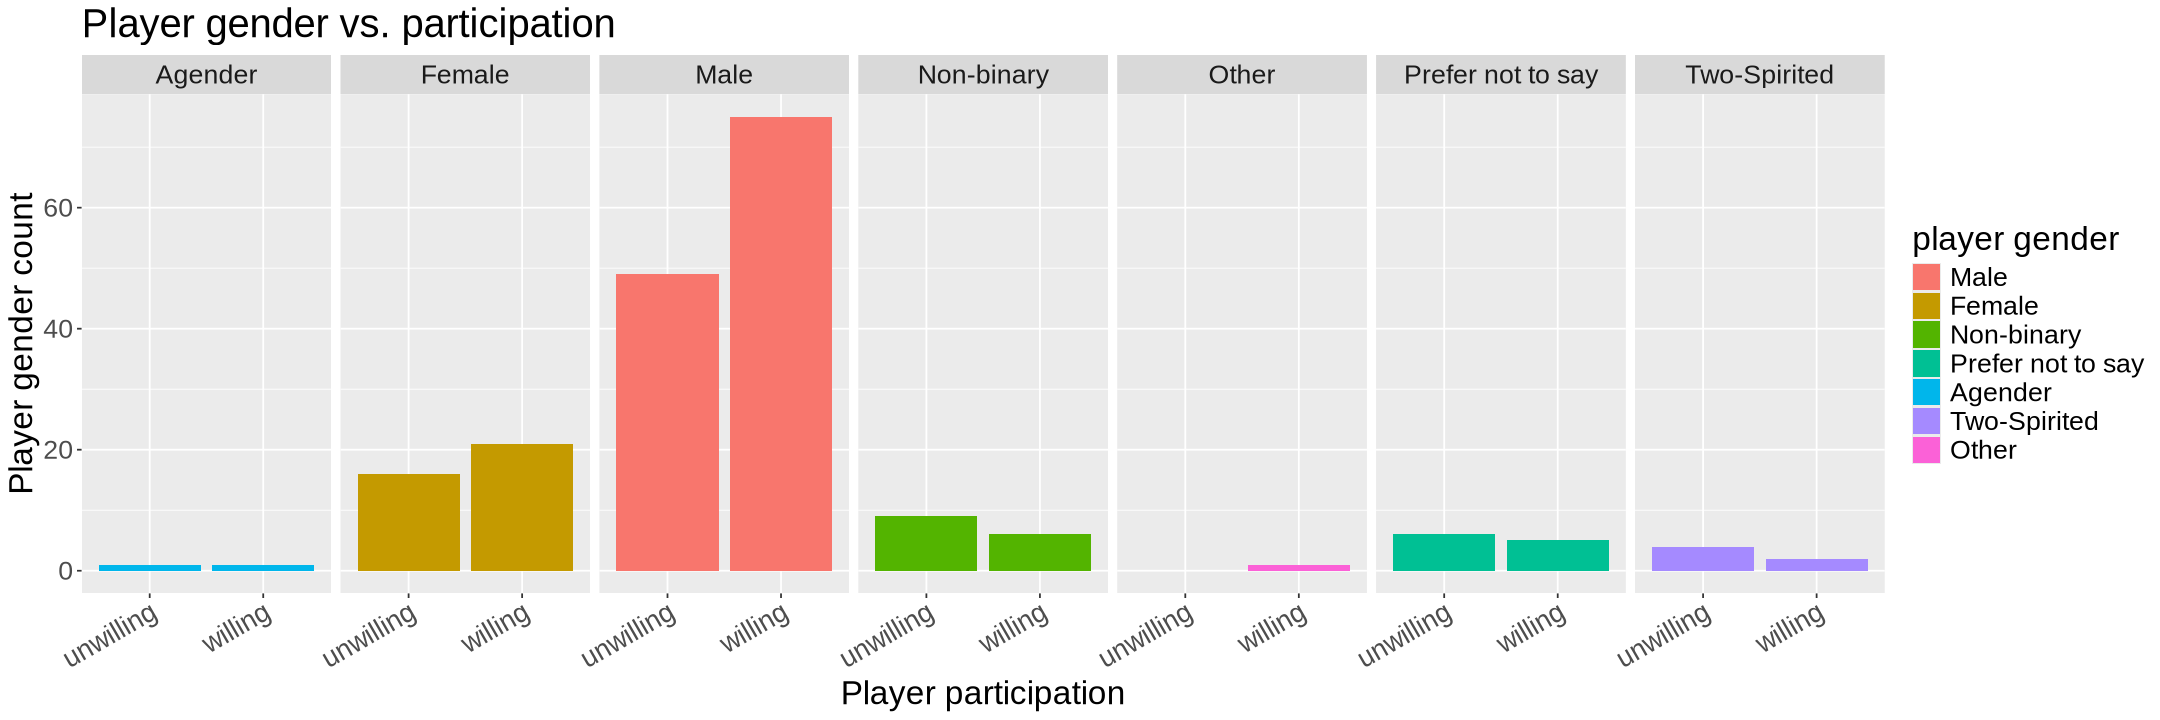

In [5]:
options(repr.plot.width = 18, repr.plot.height = 6)

participation_gender_plot <- player_demographics2 |>
ggplot(aes(x = participation, fill = as_factor(gender))) +
       geom_histogram(position = "identity", stat = "count") +
facet_grid(cols = vars(gender)) +
       xlab("Player participation") +
       ylab("Player gender count") +
       labs(title = "Player gender vs. participation", fill = "player gender") +
       theme(text = element_text(size = 20),
            legend.position = "right",
            legend.direction = "vertical",
            axis.text.x = element_text(angle = 30, hjust = 1))
participation_gender_plot

A scatter plot was made for player age against willingness to participate. by number, more players were willing to participate than unwilling, across all age groups. People in their late teens to early twenties had simmilar numbers of players willing to participate and unwilling to participate. However, children and tweens were all willing to participate, and none were unwilling. Willing participants also had a larger distribution of individuals accross ages than unwilling. There were no unwilling participants older than 50, but there were a couple willing participants in their 90's.

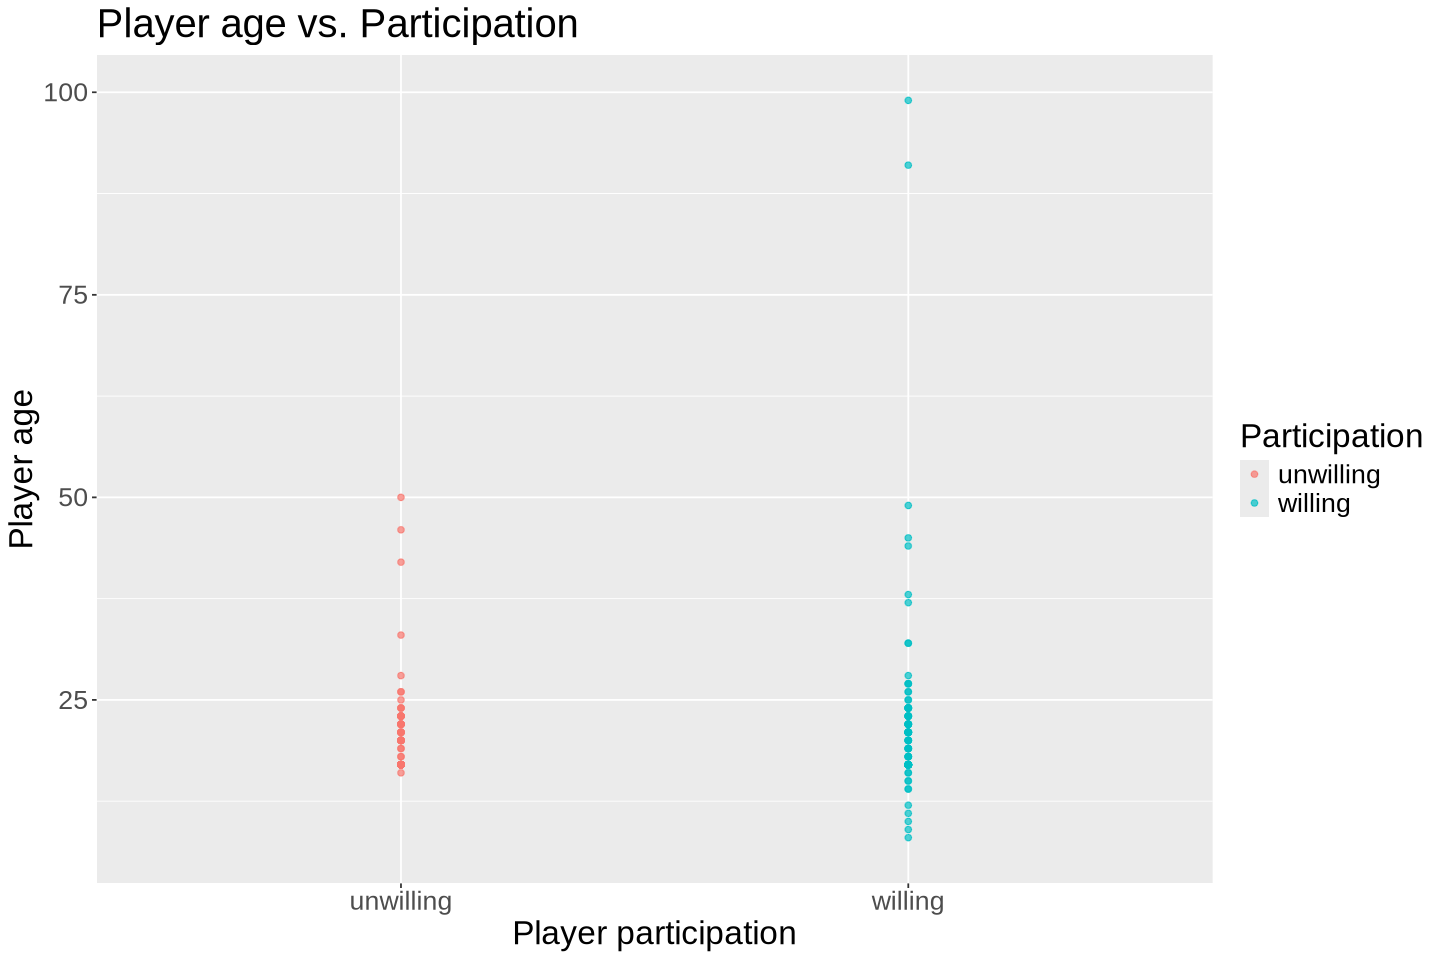

In [6]:
options(repr.plot.width = 12, repr.plot.height = 8)
participation_age_plot <- player_demographics2 |>
ggplot(aes(x = participation, y = age, color = participation)) +
geom_point(alpha = 0.7) +
ylim(c(7,100)) +
xlab("Player participation") +
ylab("Player age") +
labs(title = "Player age vs. Participation", color = "Participation") +
theme(text = element_text(size=20),
      legend.position = "right",
      legend.direction = "vertical")
participation_age_plot

Lastly for the classification response, a set of histograms was made for number of players in each experience level against participation. In all participation levels, willing players outnumbered unvilling players. Willing players outnumbered unwilling players by the most in the amateur and pro experience levels. In beginner, regular, and veteran levels, the discrepancies were not as large. Amateur level had both the most willing and unwilling pplayers, and had the most total players overall. The fewest players over all were of the pro level. 

Warning message in geom_histogram(position = "identity", stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


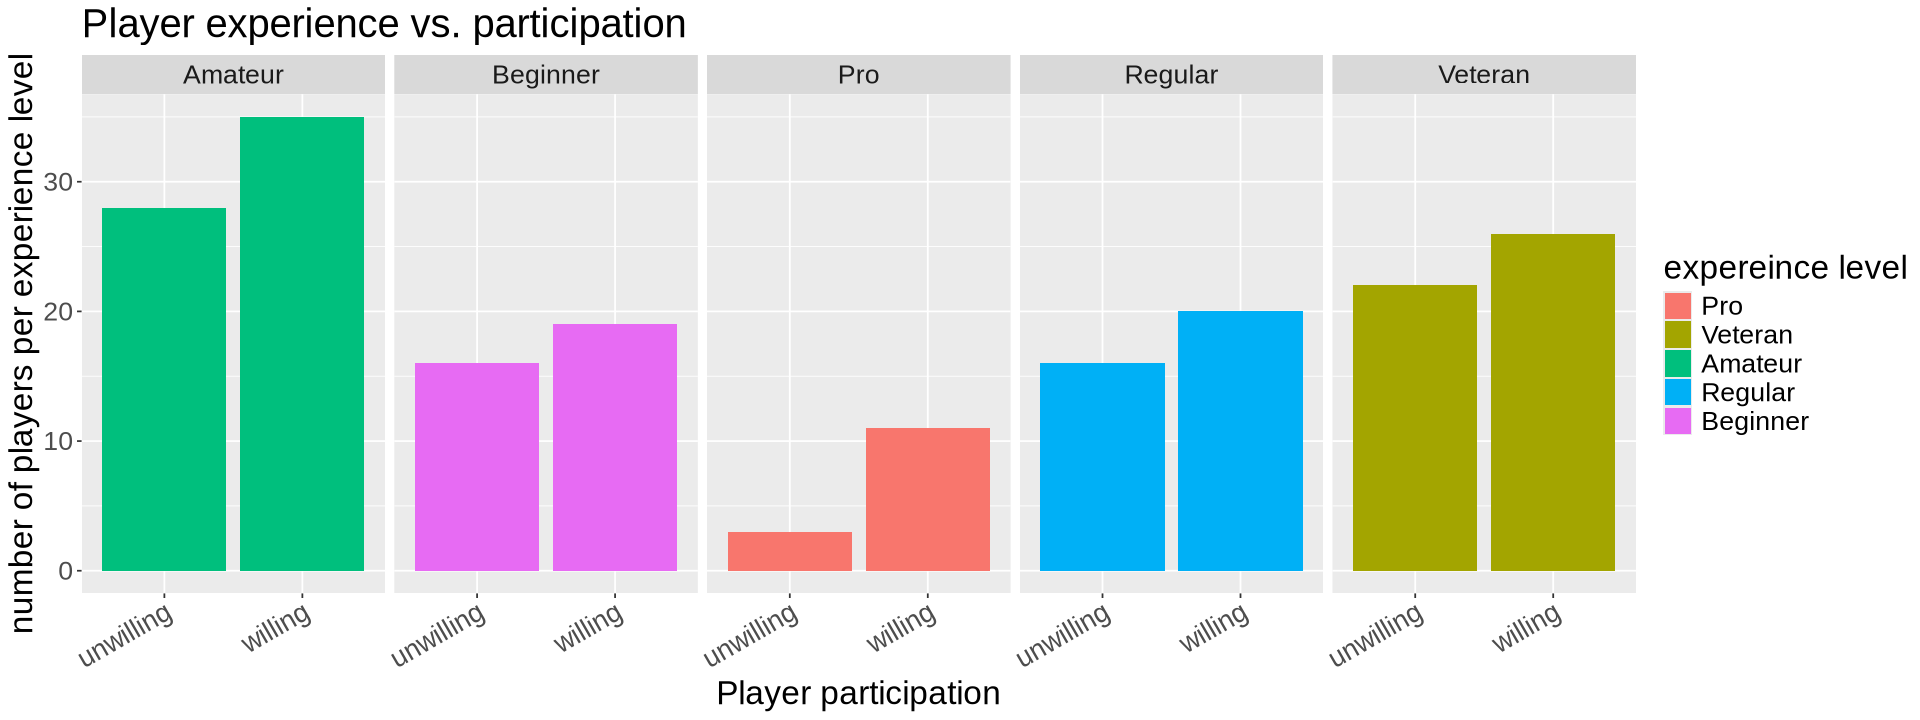

In [7]:
options(repr.plot.width = 16, repr.plot.height = 6)
participation_experience_plot <- player_demographics2 |>
ggplot(aes(x = participation, fill = as_factor(experience))) +
       geom_histogram(position = "identity", stat = "count") +
facet_grid(cols = vars(experience)) +
       xlab("Player participation") +
       ylab("number of players per experience level") +
       labs(title = "Player experience vs. participation", fill = "expereince level") +
       theme(text = element_text(size = 20),
            legend.position = "right",
            legend.direction = "vertical",
            axis.text.x = element_text(angle = 30, hjust = 1))
participation_experience_plot

For the numerical outcome, three scatterplots of played hours against player identity variables were made. Before making the graphs, the data frame was filtered for only players with hours greater than zero, since these are all the willing players. All graphs had to be logarithmically scaled on the y-axis to make data points easier to visualize. The first graph is a scatterplot of total hours logged againstplayer gender. Male and female have the highest number of players, which we have already seen. In terms of the total hours logged, male, female, and nonbinary gender identities were the only ones who had a considerable ammount of players logging more than 50 hours, with some even getting above 200 hours. These three identities also had very similar distributions to each other, with most players having loged hours above 0.5 hours and below 10. Despite having disproportionateley few players, a non-binary participant had the second highest hours logged, and the distribution of logged hours for the non-binary identity was very simmilar to that of both male and female players. This once again points to the lack of players of other gender identities perhaps not being because of a disinterst in the game itself, but some other factors related to the gaming community. Of the other four gender identities (agender, other, two-spirited, and prefer not to say), none had participants who logged above 50 hours of gameplay. These identities also had much fewer observations in the data, to few to accurateley comment on how the data is distributed.

In [8]:
willing_players <- player_demographics2 |>
filter(played_hours > 0.0) |>
select(-participation)

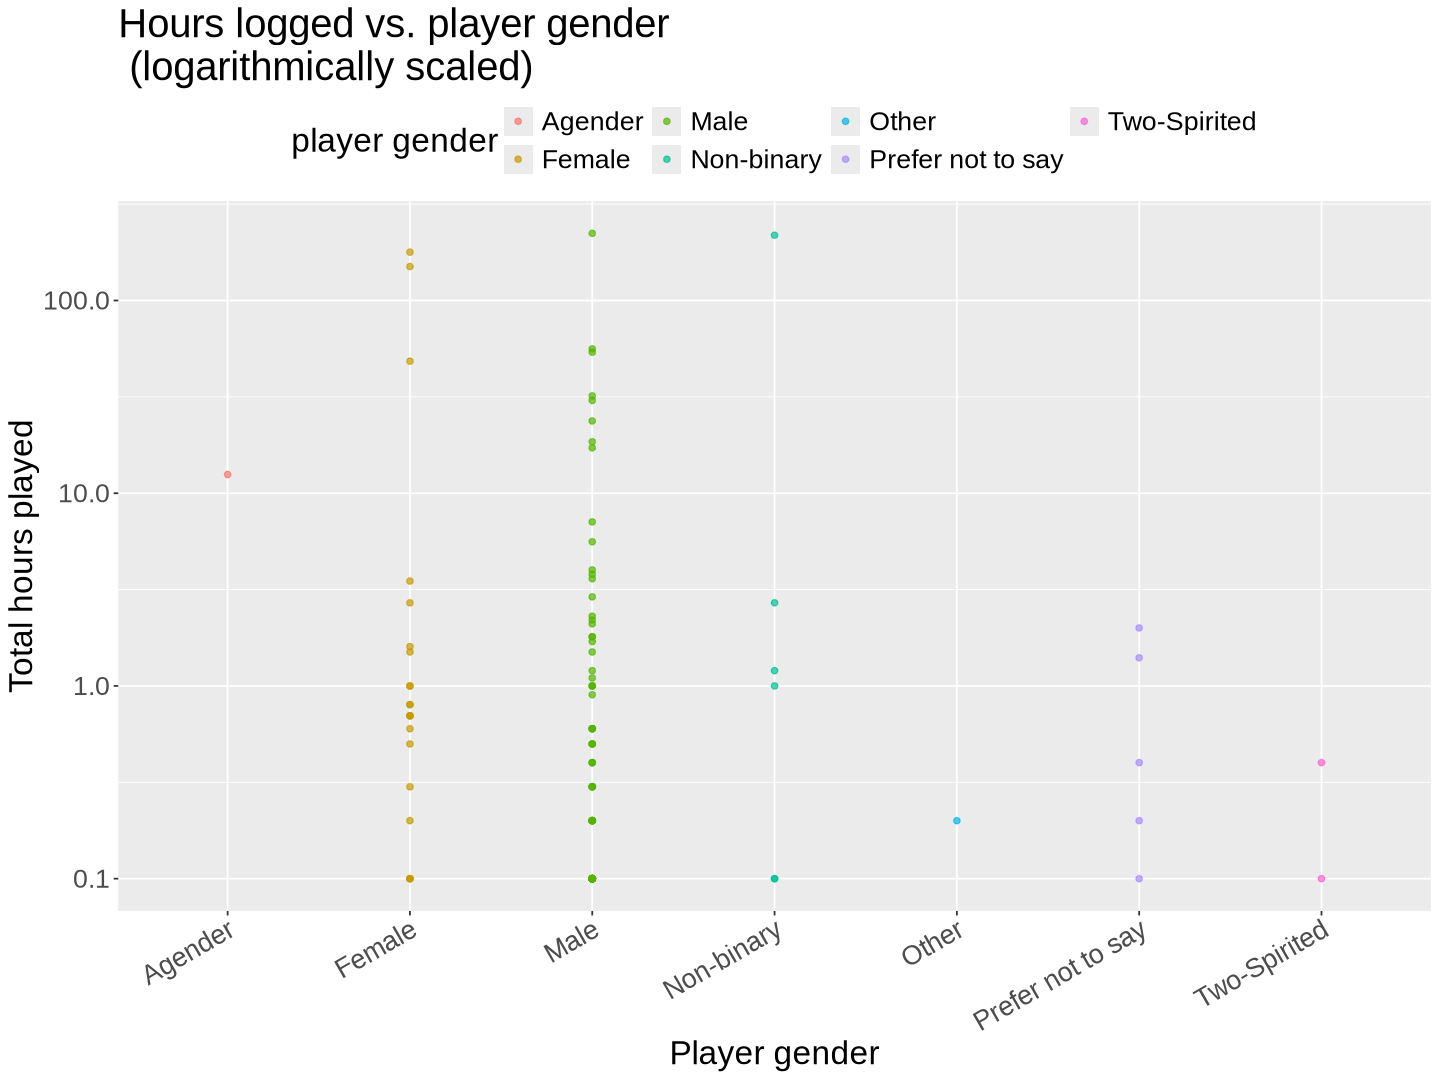

In [9]:
options(repr.plot.width = 12, repr.plot.height = 9)

hours_gender_plot <- willing_players |>
ggplot(aes(x = gender, y = played_hours, color = gender)) +
       geom_point(alpha = 0.7) +
       xlab("Player gender") +
       ylab("Total hours played") +
       labs(title = "Hours logged vs. player gender \n (logarithmically scaled)", color = "player gender") +
       theme(text = element_text(size = 20),
            legend.position = "top",
            legend.direction = "horizontal",
            axis.text.x = element_text(angle = 30, hjust = 1)) +
scale_y_log10(labels = label_comma())
hours_gender_plot

The second graph is a scatterplot of total played hours over player age. In terms of distribution, the most participants who logged hours above zero were over 10 years old and under 25, although there were some outliers. Players over 25 years dropped considerably as age increased, and so did logged hours. Players who logged over 100 hours were all in their late teens, while players over 25 never got above 50 hours logged. The relationship between hours played and age (after logarithmic scaling) appears like a squished hill curve, where hours played has a positive relationship with age until about 17-21 years at its peak value, then rappidly having a negative relationship with age for ages greater than this. Visually, this indicates that there perfect age or age range for players to contribute the most data in gameplay is somewhere between 17 and 21 years old. This is also the age range at which we have the most willing participants who would sign up to play the game.

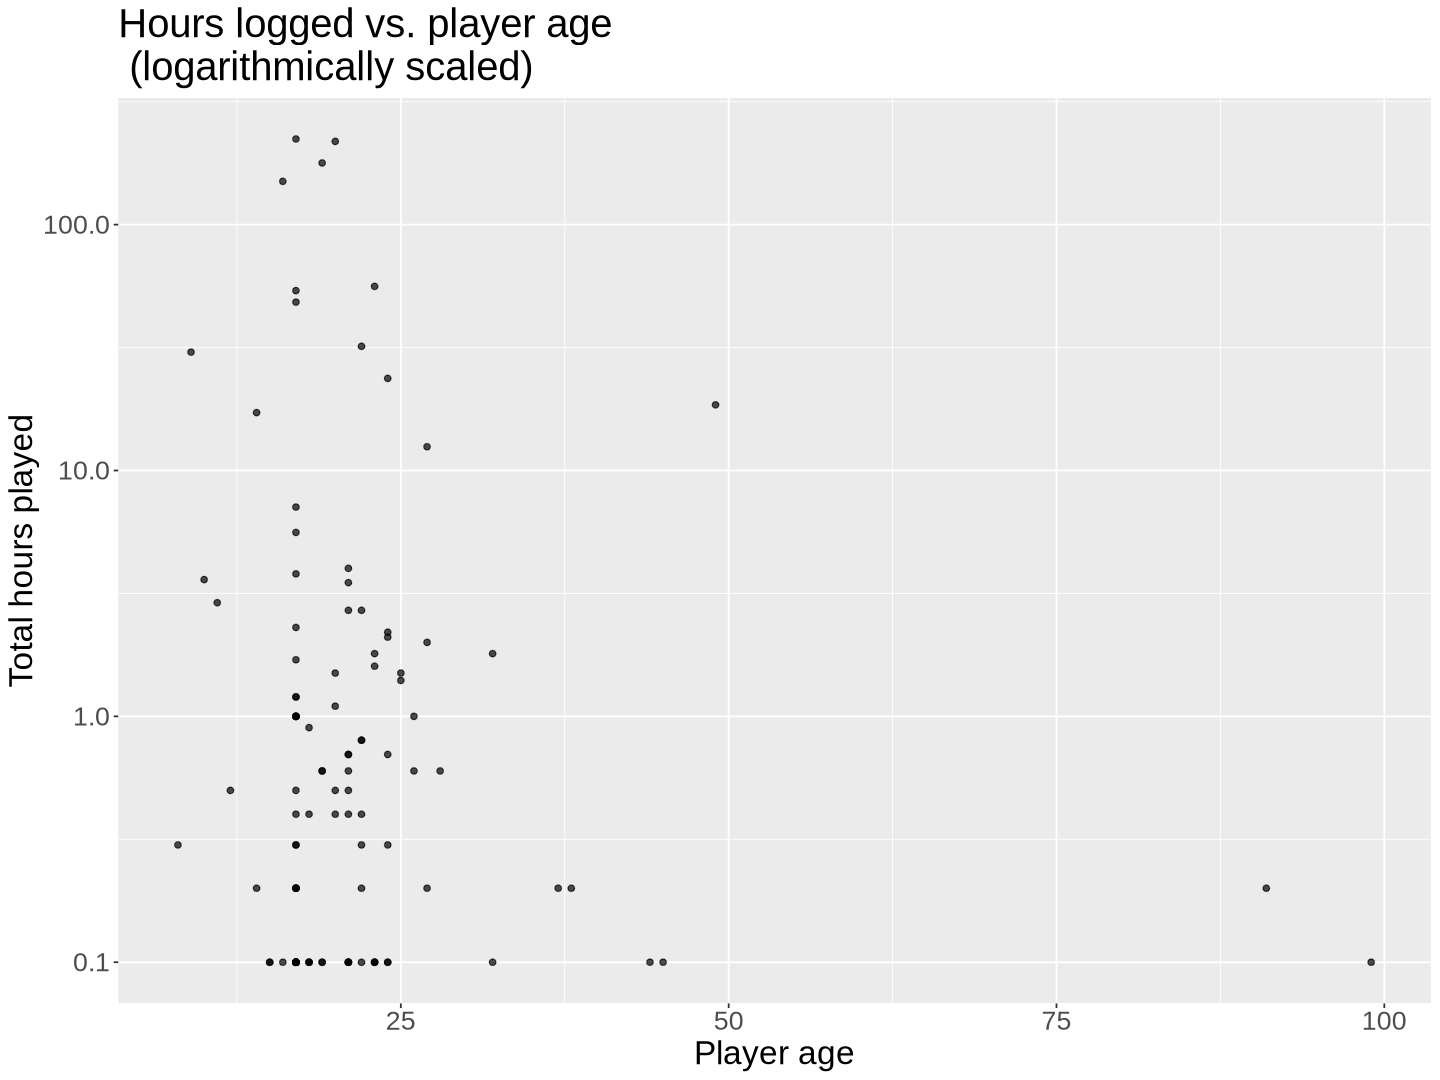

In [10]:
options(repr.plot.width = 12, repr.plot.height = 9)

hours_age_plot <- willing_players |>
ggplot(aes(x = age, y = played_hours)) +
       geom_point(alpha = 0.7) +
       xlab("Player age") +
       ylab("Total hours played") +
       labs(title = "Hours logged vs. player age \n (logarithmically scaled)") +
       theme(text = element_text(size = 20)) +
scale_y_log10(labels = label_comma())
hours_age_plot

The final visualization plot is a scatter plot of played hours against player experience level. Visually, the distribution of hours logged is very simmilar across all experience levels. Accross all experience levels, most players played more than 0.5 hours and less than 10. Players who played more than 50 hours were of the amateur and regular experience levels; players of the amateur level had the most participants with above 50 hours logged. Begginer, pro, and veteran levels all had similar distributions, with no players in these levels logging more than 50 hours. There doesnt seem to be as mush of a difference in hours logged accross experience levels, as tere was for player age and player gender. As such this may not be a good predictor variable for either willingness to play, or for which demographic will contribute the most gameplay hours.

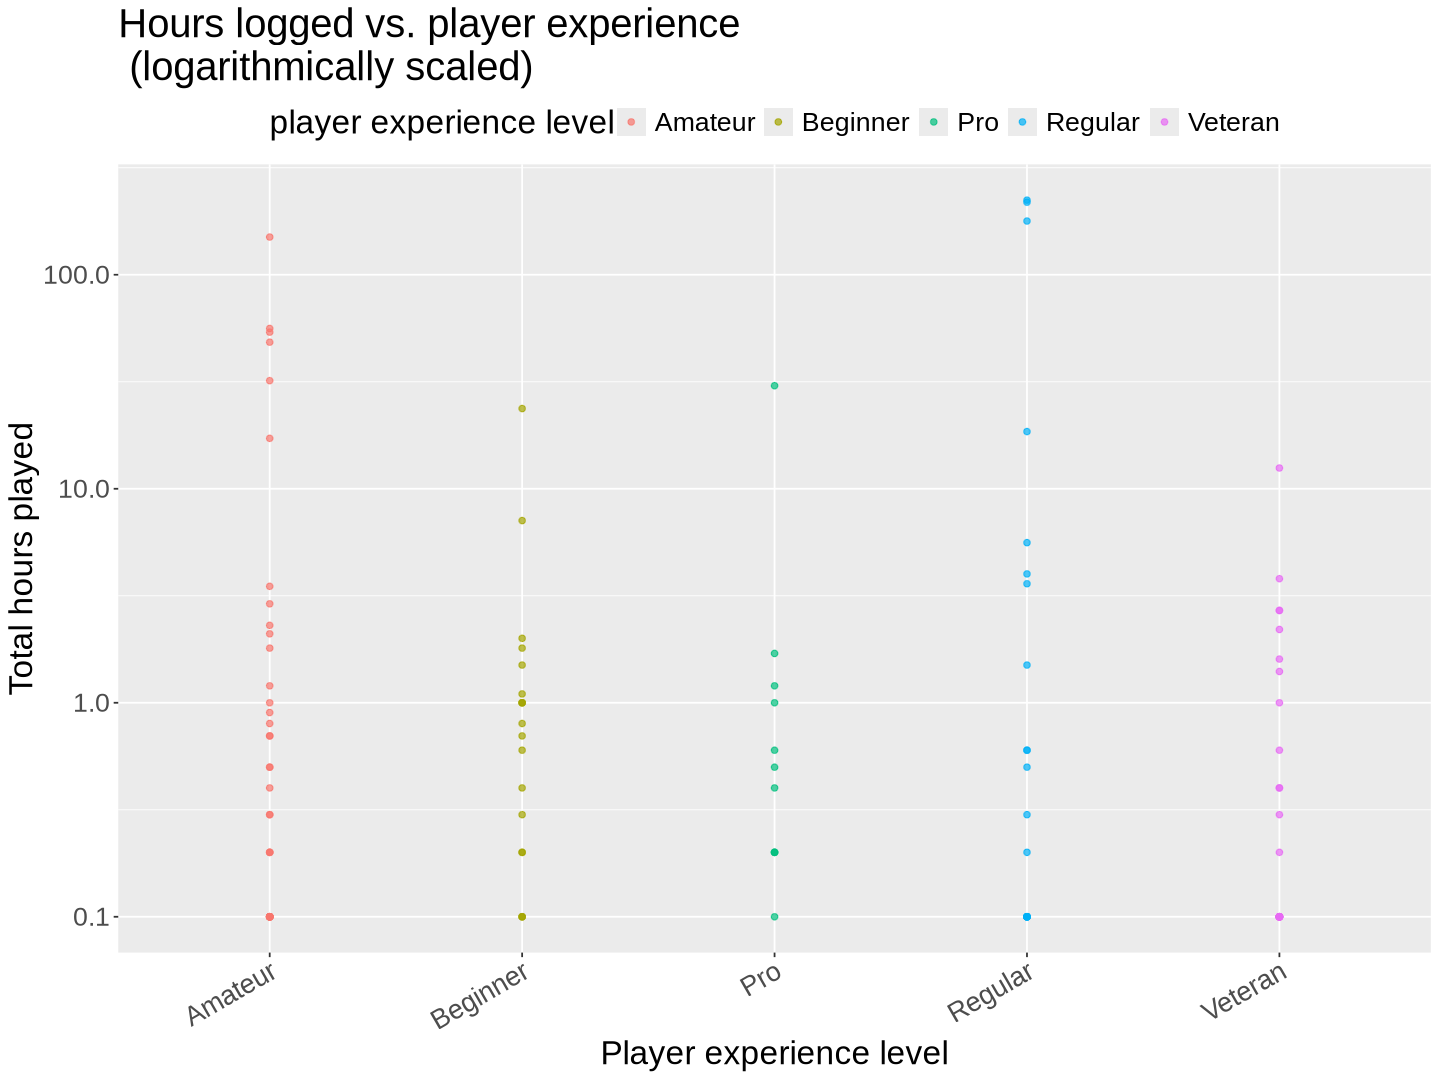

In [11]:
options(repr.plot.width = 12, repr.plot.height = 9)

hours_experience_plot <- willing_players |>
ggplot(aes(x = experience, y = played_hours, color = experience)) +
       geom_point(alpha = 0.7) +
       xlab("Player experience level") +
       ylab("Total hours played") +
       labs(title = "Hours logged vs. player experience \n (logarithmically scaled)", color = "player experience level") +
       theme(text = element_text(size = 20),
            legend.position = "top",
            legend.direction = "horizontal",
            axis.text.x = element_text(angle = 30, hjust = 1)) +
scale_y_log10(labels = label_comma())
hours_experience_plot

#### Summary statistics

Before calculating summary statistics, any players that werre unwilling to play were filtered out. This is to make sure the summaries are only those related to players that would actually play the game. Summaries for variables such as hours played and player gender, age, and experience would otherwise be skewed by players who had zero hours logged, and thus didn't actually contribute data.

By gender identity, two-spirited players had the had the lowest hours played on average, while non-binary players had the highest. By experience level, veteran players (surprisingly) had the lowest hours played on average, while regular players had the highest hpurs played by a wide margin. The average ages at each experience level were all relativelye homogenous, between 20 and 23 years old. the average player age for each gender was a bit less homogenous than for experience level, but (excluding two-spirit and other) were still in this range of 20 to 23 years old.

At this point, it is important to point out one more issue with the dataset that may be relevant later when doing predictive analysis. While there is a good ammount of players of the gender identity male, female, and non-binary, there are comparitiveley few players of the other gender identities. As such, some summary statistics are a little... iffy, to say the least. In the gender and average player age tibble, we can see that the average age for Two-Spirited people and people who chose other is 33 and 91 years respectiveley (the latter being so drastically different because there is only a single player in the sample with this gender identity, who happened to also be very different in age). this differs heavily from the other gender identity average ages, as well as the average ages for experience level. since there arent enough players of these two gender demographics in the data set, the summary statistics we get for them may not actually be representative of what is actually acurate for these demogrpahics. this may also be an issue with agender players, and players who prefer not to say their gender identity, since there are also few of those people in our dataset.

In [12]:
gender_avg_hours <- player_demographics2 |>
filter(participation == "willing") |>
select(gender, played_hours) |>
group_by(gender) |>
summarize(avg_hours_played = mean(played_hours))
gender_avg_hours

gender_avg_age <- player_demographics2 |>
filter(participation == "willing") |>
select(gender, age) |>
group_by(gender) |>
summarize(avg_player_age = mean(age))
gender_avg_age

experience_avg_hours <- player_demographics2 |>
filter(participation == "willing") |>
select(experience, played_hours) |>
group_by(experience) |>
summarize(avg_hours_played = mean(played_hours))
experience_avg_hours

experience_avg_age <- player_demographics2 |>
filter(participation == "willing") |>
select(experience, age) |>
group_by(experience) |>
summarize(avg_player_age = mean(age))
experience_avg_age

gender,avg_hours_played
<chr>,<dbl>
Agender,12.5000
Female,18.7381
Male,6.8240
Non-binary,37.2000
Other,0.2000
Prefer not to say,0.8200
Two-Spirited,0.2500


gender,avg_player_age
<chr>,<dbl>
Agender,27.00000
Female,22.95238
Male,19.98667
Non-binary,18.16667
Other,91.00000
Prefer not to say,21.60000
Two-Spirited,58.00000


experience,avg_hours_played
<chr>,<dbl>
Amateur,10.831429
Beginner,2.300000
Pro,3.309091
Regular,32.775000
Veteran,1.196154


experience,avg_player_age
<chr>,<dbl>
Amateur,20.71429
Beginner,22.05263
Pro,22.90909
Regular,23.85000
Veteran,21.50000


The majority of players were male, by a considerable ammount. the least populous gender identities in the dataset were Two-Spirited, preffer not to say, and other. this information, coupled with the average age sommary statistices earlier, shows that male players of around age 20 are the demographic that should be targeted to obtain the greatest ammount of data, as this demographis seems the most likeley to play the game at all. By experience level, the majority of players were of ammature experience.


In [13]:
gender_number_players <- player_demographics2 |>
filter(participation == "willing") |>
select(gender, experience) |>
group_by(gender) |>
count()
gender_number_players

experience_number_players <- player_demographics2 |>
filter(participation == "willing") |>
select(gender, experience) |>
group_by(experience) |>
count()
experience_number_players

gender,n
<chr>,<int>
Agender,1
Female,21
Male,75
Non-binary,6
Other,1
Prefer not to say,5
Two-Spirited,2


experience,n
<chr>,<int>
Amateur,35
Beginner,19
Pro,11
Regular,20
Veteran,26


#### Classification with K-Nearest Neighbors  -- Willing vs. Unwilling

The first step to determining which players to target for recruitment, to provide the most data, is to determine which demographic is most likeley to play at all. In the data file for player-related data, there were several enteries where players had zero hours logged. These players were labeled as unwilling. Any players with logged hours greater than zero hours were labeled as willing. In order to predict a players participation status with the variables at hand, any character or factor predictors had to be converted to numeric. Each gender observation was given a coresponding numeric value:

| Gender identity    | Corresponding number |
| ------------------ | -------------------- |
| Male               | 1                    |
| Female             | 2                    |
| Non-binary         | 3                    |
| Agender            | 4                    |
| Other              | 5                    |
| Prefer not to say  | 6                    |
| Two-Spirited       | 7                    |

Additionally, each experience observation was given a corresponding numerical value:

| Experience level   | Corresponding number |
| ------------------ | -------------------- |
| Amateur            | 1                    |
| Beginner           | 2                    |
| Pro                | 3                    |
| Regular            | 4                    |
| Veteran            | 5                    |

The last predictor variable, age, was already numeric and didn't need to be converted. The dataframe was split 75:25, and participation was set as the classification variable. A recipe was made specifying the predictor variables to be used on the training split.

In [14]:
player_demographics2 <- player_demographics2 |>
mutate(participation = as_factor(participation)) |>
mutate(gender_number = case_when(gender == "Male" ~ 1,
                                gender == "Female" ~ 2,
                                gender == "Non-binary" ~ 3,
                                gender == "Agender" ~ 4,
                                gender == "Other" ~ 5,
                                gender == "Prefer not to say" ~ 6,
                                gender == "Two-Spirited" ~ 7)) |>
mutate(experience_number = case_when(experience == "Amateur" ~ 1,
                                experience == "Beginner" ~ 2,
                                experience == "Pro" ~ 3,
                                experience == "Regular" ~ 4,
                                experience == "Veteran" ~ 5))
player_demographics2

set.seed(200)

player_split <- initial_split(player_demographics2, prop = 0.75, strata = participation)
player_train <- training(player_split)
player_test <- testing(player_split)

player_recipe <- recipe(participation ~ gender_number + age + experience_number, data = player_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

experience,played_hours,gender,age,participation,gender_number,experience_number
<chr>,<dbl>,<chr>,<dbl>,<fct>,<dbl>,<dbl>
Pro,30.3,Male,9,willing,1,3
Veteran,3.8,Male,17,willing,1,5
Veteran,0.0,Male,17,unwilling,1,5
Amateur,0.7,Female,21,willing,2,1
Regular,0.1,Male,21,willing,1,4
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,0.0,Female,17,unwilling,2,1
Veteran,0.3,Male,22,willing,1,5
Amateur,0.0,Prefer not to say,17,unwilling,6,1


Before creating a model specification to predict a players participation status, the classification model was first tuned. The training data was cross validated, with 5 folds. The sequence of neighbors used was between 1 and 40, and each neighbor was stepped by one. A recipe was made with the recipe and model, metrics were collected, and accuracy was filtered. 

In [15]:
set.seed(200)

player_spec <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

player_vfold <- vfold_cv(player_train, v = 5, strata = participation)
player_vals <- tibble(neighbors = seq(from = 1, to = 40, by = 1))

player_results <- workflow() |>
  add_recipe(player_recipe) |>
  add_model(player_spec) |>
  tune_grid(resamples = player_vfold, grid = player_vals) |>
  collect_metrics() |>
filter(.metric == "accuracy")
player_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4652381,5,0.03358409,Preprocessor1_Model01
2,accuracy,binary,0.4452381,5,0.03269803,Preprocessor1_Model02
3,accuracy,binary,0.5085714,5,0.05428154,Preprocessor1_Model03
4,accuracy,binary,0.5480952,5,0.03489862,Preprocessor1_Model04
5,accuracy,binary,0.4661905,5,0.03696539,Preprocessor1_Model05
⋮,⋮,⋮,⋮,⋮,⋮,⋮
36,accuracy,binary,0.5338095,5,0.03333673,Preprocessor1_Model36
37,accuracy,binary,0.5342857,5,0.03009433,Preprocessor1_Model37
38,accuracy,binary,0.5133333,5,0.02260777,Preprocessor1_Model38


To determine which of the K values provided the highest accuracy, a plot of accuracy versus number of neighbors was created, and the best K value was also pulled from the results workflow. The graph of accuracy over K was nonlinear and uneven, however, the most accurate K value was predicted to be 33 neighbors. On the graph, you can see that this K value is considerably higher in accuracy than an other K values from 1 to 40. The accuracy value for this K was still relativeley low, at 59%, but was still the best that could be achieved even after changing some of the predictor variables in the recipe, as well as the number of neighbors tested. 

[1] 33

[1] 0.5895238

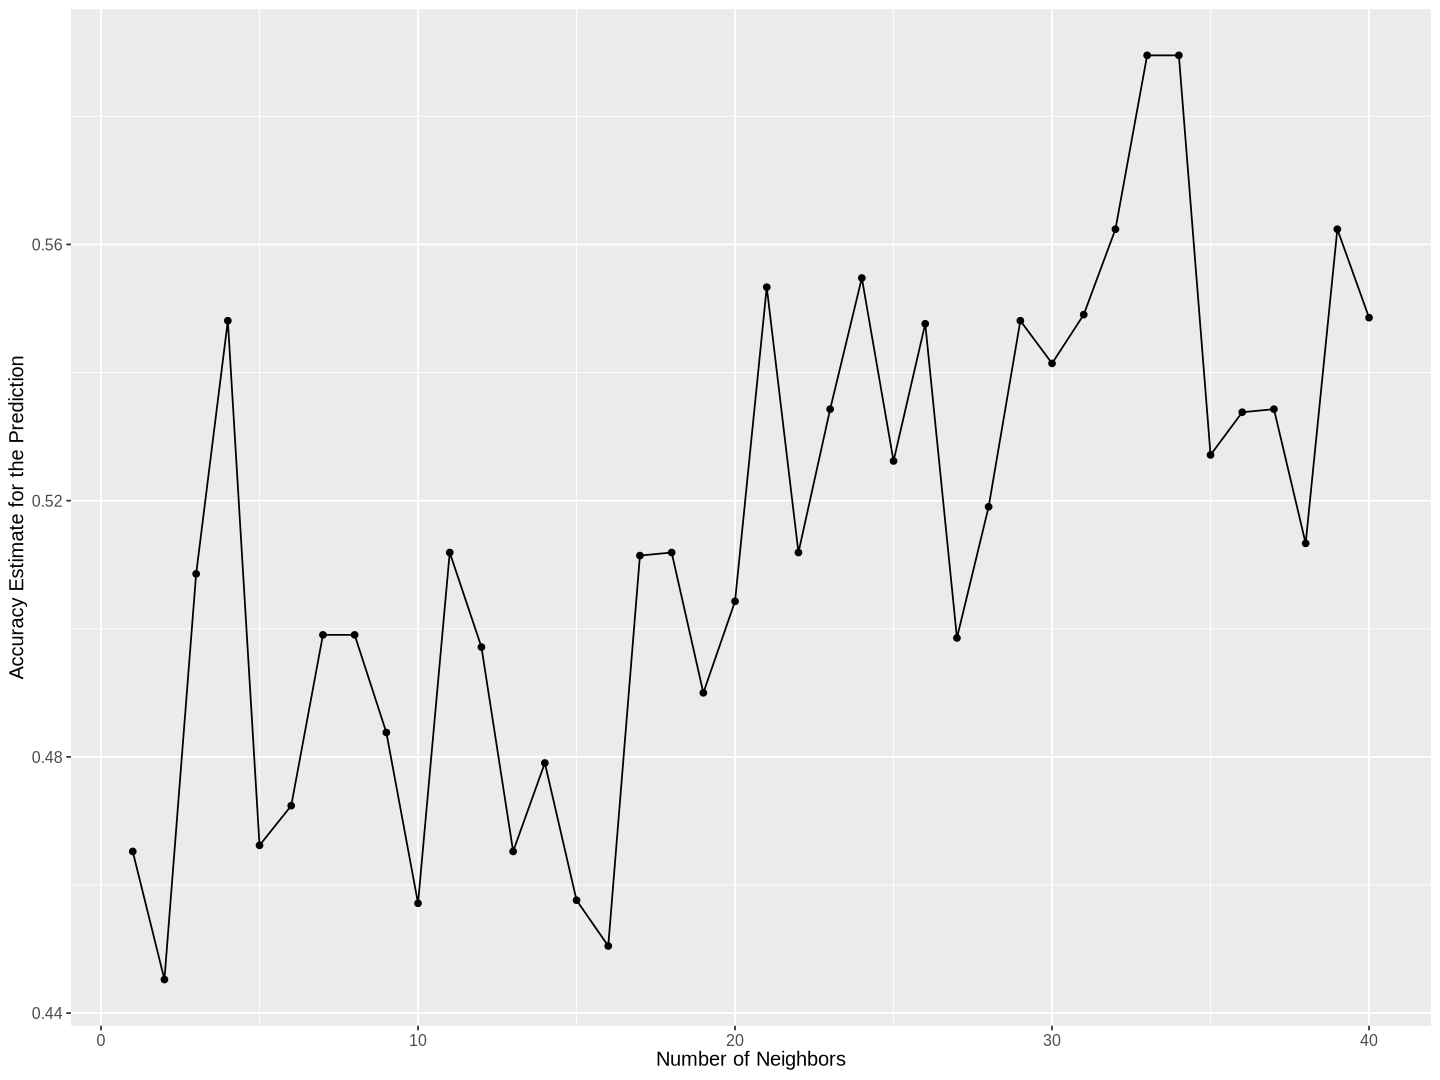

In [16]:
accuracy_vs_k <- ggplot(player_results, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Number of Neighbors", y = "Accuracy Estimate for the Prediction") +
  theme(text = element_text(size = 12))
accuracy_vs_k

best_k <- player_results |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

best_accuracy <- best_k <- player_results |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(mean)
best_accuracy

After determining the best K value, a new model was made using this K value, and was added into a workflow with the same recipe as before. The workflow was fit onto the training split, and the fitted data was used to predict on the testing split. Accuracy, precision, and recall were all measured for the model:

| Metric             | Value                |
| ------------------ | -------------------- |
| Accuracy           | 0.52                 |
| Precision          | 0.58                 |
| Recall             | 0.54                 |

As you can see, the accuracy on the testing split is a bit lower than that on the training split, at 52%. Precision is at 58%, and recall is at 54%. Most of these values aren't particularly good, but were the best that could be achieved. A confusion matrix was also made comparing prediction and truth:

|                    | Truth                   |
| ------------------ | ----------------------- |
| Prediction         | Willing      Unwilling  |
| Willing            | 15           11         |
| Unwilling          | 13           11         |

In [17]:
set.seed(200)

bestk_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 33) |>
  set_engine("kknn") |>
  set_mode("classification")

player_fit <- workflow() |>
  add_recipe(player_recipe) |>
  add_model(bestk_spec) |>
  fit(data = player_train)

player_test_predictions <- predict(player_fit, player_test) |>
  bind_cols(player_test)
player_test_predictions

.pred_class,experience,played_hours,gender,age,participation,gender_number,experience_number
<fct>,<chr>,<dbl>,<chr>,<dbl>,<fct>,<dbl>,<dbl>
willing,Amateur,0.0,Female,17,unwilling,2,1
unwilling,Veteran,1.6,Female,23,willing,2,5
unwilling,Veteran,0.0,Non-binary,17,unwilling,3,5
willing,Amateur,0.0,Male,22,unwilling,1,1
willing,Beginner,0.0,Female,17,unwilling,2,2
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
willing,Amateur,1.0,Male,26,willing,1,1
unwilling,Veteran,0.1,Male,17,willing,1,5
willing,Regular,0.0,Male,50,unwilling,1,4


In [18]:
levels <- player_test_predictions |>
pull(participation) |>
levels()
levels

[1] "willing"   "unwilling"

In [19]:
accuracy <- player_test_predictions |>
  metrics(truth = participation, estimate = .pred_class) |>
  filter(.metric == "accuracy")

precision <- player_test_predictions |>
    precision(truth = participation, estimate = .pred_class, event_level="first")

recall <- player_test_predictions |>
  recall(truth = participation, estimate = .pred_class, event_level = "first")

confusion <- player_test_predictions |>
             conf_mat(truth = participation, estimate = .pred_class)

#### Regression with K-Nearest Neighbors

After determining which players are willing to play the game, the number of hours a player will contribute must also be determined to see what kinds of players will provide the most data. Since a numerical value is being predicted, the model made for this problem is a regression model. KNN regression is appropriate for this, problem since the relationship between the predictor variables and hours played is nonlinear. The dataframe was split 70:30 and played_hours was set as the outcome variable. All the numerical values corresponding to the character predictors remained the same as when building the classification model. All players with 0 hours logged were also filtered out.

In [20]:
willing_player_hours <- player_demographics2 |>
filter(played_hours > 0.0)
willing_player_hours

experience,played_hours,gender,age,participation,gender_number,experience_number
<chr>,<dbl>,<chr>,<dbl>,<fct>,<dbl>,<dbl>
Pro,30.3,Male,9,willing,1,3
Veteran,3.8,Male,17,willing,1,5
Amateur,0.7,Female,21,willing,2,1
Regular,0.1,Male,21,willing,1,4
Amateur,0.1,Male,17,willing,1,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Regular,0.1,Male,18,willing,1,4
Veteran,0.1,Female,44,willing,2,5
Veteran,0.3,Male,22,willing,1,5


In [21]:
set.seed(230)

hours_split <- initial_split(willing_player_hours, prop = 0.70, strata = played_hours)
hours_train <- training(hours_split)
hours_test <- testing(hours_split)

hours_played_recipe <- recipe(played_hours ~ age + gender_number + experience_number, data = hours_train) |>
step_scale(all_predictors()) |>
step_center(all_predictors())

hours_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
set_engine("kknn") |>
set_mode("regression")

For the regression model, the training data was cross-validated with 4 folds rather than 5, as this gave the best (lowest) rmse value. Once again, between 1 and 40 neighbors were tested, with each stepped by 1. A workflow of wesults was set up with the recipe and regression model, metrics were collected, and RMSE was filtered for.

In [22]:
set.seed(230)

hours_vfold <- vfold_cv(hours_train, v = 4, strata = played_hours)
grid_vals <- tibble(neighbors = seq(from = 1, to = 40, by = 1))

hours_test_results <- workflow() |>
  add_recipe(hours_played_recipe) |>
  add_model(hours_knn_spec) |>
  tune_grid(resamples = hours_vfold, grid = grid_vals) |>
  collect_metrics() |>
  filter(.metric == "rmse")
hours_test_results

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 3 breaks instead.”


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,47.63093,4,15.204222,Preprocessor1_Model01
2,rmse,standard,56.10008,4,4.814578,Preprocessor1_Model02
3,rmse,standard,51.82761,4,7.283469,Preprocessor1_Model03
4,rmse,standard,46.95010,4,9.155143,Preprocessor1_Model04
5,rmse,standard,42.11910,4,9.850406,Preprocessor1_Model05
⋮,⋮,⋮,⋮,⋮,⋮,⋮
36,rmse,standard,39.53602,4,12.06922,Preprocessor1_Model36
37,rmse,standard,39.43070,4,12.19534,Preprocessor1_Model37
38,rmse,standard,39.44616,4,12.24212,Preprocessor1_Model38


To determine the lowest RMSE walue, the minnimum mean was filtered for. This was determined to be an error of approximateley 38. From there, the best K value was determined to be 25 neighbors. A plot of RMSE value versus number of neighbors was created for visulalization. At k < 5, there is a drastic increase then decrease in RMSE value. At 5 < K < 25, the RMSE slowly decreses as K incresaes, in the typical manner of a graph of RMSE versus number of neighbors. At 25 < K < 40, the RMSE value also increases slowly in the usulal manner.

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
25,rmse,standard,38.13629,4,13.11557,Preprocessor1_Model25


[1] 25

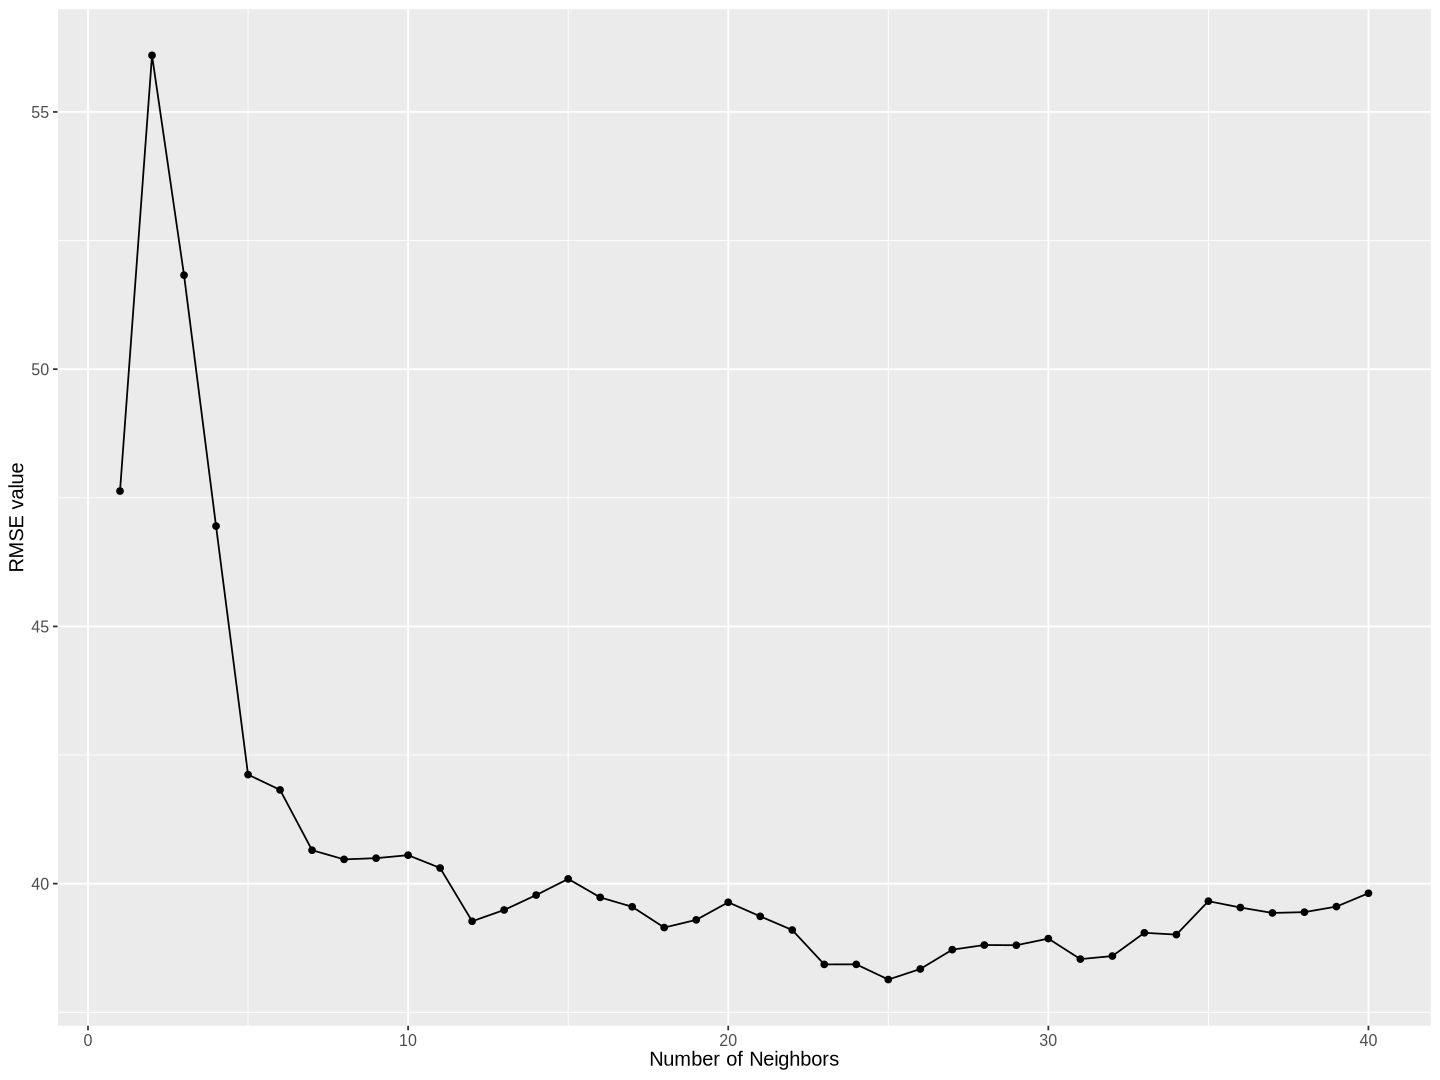

In [23]:
rmse_min <- hours_test_results |>
filter(mean == min(mean))
rmse_min

k_min <- rmse_min |>
pull(neighbors)
k_min

RMSE_vs_k <- ggplot(hours_test_results, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Number of Neighbors", y = "RMSE value") +
  theme(text = element_text(size = 12))
RMSE_vs_k

Lastly, after finding the ideal number of neighbors, the final regression model for hours played was made with the K value. A workflow was made with the same recipe as was used in training the model, as well as the new model specification with the best K value. This was then fitted to the training split. A prediction was made on the testing split using the fitted model, and the RMSPE was collected for the prediction. This RMSPE value was approximateley 19, meaning it was better than the best (lowest) RMSE that we got when training our model. Therefore, we can say the regression model we made for predicting hours played based on player identity predictor variables was pretty successful.

In [24]:
set.seed(230)

hours_best_spec <- hours_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 25) |>
set_engine("kknn") |>
set_mode("regression")

hours_train_fit <- workflow() |>
  add_recipe(hours_played_recipe) |>
  add_model(hours_best_spec) |>
  fit(data = hours_train)

hours_test_summary <- hours_train_fit |>
  predict(hours_test) |>
  bind_cols(hours_test) |>
  metrics(truth = played_hours, estimate = .pred) |>
  filter(.metric == 'rmse')
hours_test_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,18.75679


#### Classification with K-Nearest Neighbors -- High vs. Low Contribution Potential

The previous k-nearest neighbors classification methodology was replicated, except instead of willingness to contribute, players were partitioned based on their contribution potential. 3 hours was selected as the border between high and low contribution. 

In [25]:
set.seed(200)

player_demographics3 <- player_demographics |>

##preprocessing of player_demographics; including creation of new "contribution potential" variable

mutate(contribution_potential = case_when(played_hours >= 3.0 ~ "high",
                                played_hours < 3.0 ~ "low")) |>
mutate(contribution_potential = as_factor(contribution_potential)) |>
mutate(gender_number = case_when(gender == "Male" ~ 1,
                                gender == "Female" ~ 2,
                                gender == "Non-binary" ~ 3,
                                gender == "Agender" ~ 4,
                                gender == "Other" ~ 5,
                                gender == "Prefer not to say" ~ 6,
                                gender == "Two-Spirited" ~ 7)) |>
mutate(experience_number = case_when(experience == "Amateur" ~ 1,
                                experience == "Beginner" ~ 2,
                                experience == "Pro" ~ 3,
                                experience == "Regular" ~ 4,
                                experience == "Veteran" ~ 5))

##partition into training and testing set -- 75/25 respectively

player_split2 <- initial_split(player_demographics3, prop = 0.75, strata = contribution_potential)
player_train2 <- training(player_split2)
player_test2 <- testing(player_split2)

##recipe creation predicting contribution potential from gender, age, and experience

player_recipe2 <- recipe(contribution_potential ~ gender_number + age + experience_number, data = player_train2) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

##tuning to find best number of neighbors

player_spec2 <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

player_vfold2 <- vfold_cv(player_train2, v = 5, strata = contribution_potential)

player_results2 <- workflow() |>
  add_recipe(player_recipe2) |>
  add_model(player_spec2) |>
  tune_grid(resamples = player_vfold2, grid = player_vals) |>
  collect_metrics() |>
  filter(.metric == "accuracy")

##most accurate number of neighbors

best_k2 <- player_results2 |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)

##accuracy associated with above number of neighbors

best_accuracy2 <- best_k <- player_results2 |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(mean)

##k-nearest neighbors algorithm with best number of neighbors

bestk_spec2 <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k2) |>
  set_engine("kknn") |>
  set_mode("classification")

player_fit2 <- workflow() |>
  add_recipe(player_recipe2) |>
  add_model(bestk_spec2) |>
  fit(data = player_train2)

player_test_predictions2 <- predict(player_fit2, player_test2) |>
  bind_cols(player_test2)

##confusion matrix of above k-nearest neighbors algorithm on the testing set

accuracy2 <- player_test_predictions2 |>
  metrics(truth = contribution_potential, estimate = .pred_class) |>
  filter(.metric == "accuracy")

precision2 <- player_test_predictions2 |>
    precision(truth = contribution_potential, estimate = .pred_class, event_level="first")

recall2 <- player_test_predictions2 |>
  recall(truth = contribution_potential, estimate = .pred_class, event_level = "first")

confusion2 <- player_test_predictions2 |>

             conf_mat(truth = contribution_potential, estimate = .pred_class)

Warning message:
“While computing binary `precision()`, no predicted events were detected (i.e.
`true_positive + false_positive = 0`).
Precision is undefined in this case, and `NA` will be returned.
Note that 3 true event(s) actually occurred for the problematic event level,
high”


#### Discussion

After visualization, summary statistics, and modeling, the two "kinds" of players most likeley to contribute data to the study were determined to be male players of around 20 years old, and female players of around 23 years old. The ttree kings of players that would contribute the most data if recruited, however, were determined to be Non-binary, female, and agender players. Male and female gender identities had the most observations, with male players making up 67.6% of willing players, and female players making up 18%. In terms of hours, female players willing to play had an average of 18.7 hours logged, while male players had an average of 6.8 hours logged. Despite only making up 5.4% of players, the gender identity with the highest average hours logged was Non-binary, at 37.2 hours. This gender identity had an average age of 18 years. Agender players had similar summary statistics situation to Non-binary players, making up just under 1% of willing players, but having 12.5 average hours logged. The age of this one singular player was 27 years. The players with more than 200 hours logged were male (17 years) and Non-binary (20 years). The players with over 100 hours but less than 200 were both female, age 19 and 16. Other gender identities had too few observations and/or too few hours logged to be be worth targeting for recruitment.
By experience, ammateur and veteran players made up the highest percentage of willing players. Ammateur players made up 31.5% of willing players, while Veterans made up 23.4%. However, the differences in number of observations between player expereince levels was not nearly as dramatic as that for age and gender. The average hours logged for each expereince level were roughly equal. all experience levels had between 21 and 24 average hours logged. Therefore, this aspect of a persons identity doesnt seem to be a determining factor in wether they will be willing to play, or how many hours they are willing to contribute.

If we consider the statistics summarized above, the groups most worth targetting in terms of gender would be male players due to observation abundance, and Non-binary players due to them being correlated to the largest average of logged hours. Additionally, outstanding players with unusually high playtimes relative to other observations were typically in a younger age range (preteens, teens, young adults). As such, age is a significant element of this analysis, through the sheer amount of hours contributed. In terms of experience, targetting Amateur, and Veteran players would be the most effective, regarding their proportions in the dataset rather than hours logged.

According to `esa (entertainment software association)'s` report on the `2024 US Video Game Industry`, the average age of video game players in the United States is 34 years, of which most play games available on mobile devices. Furthermore, younger players (Gen Z, and Gen Alpha) constitute the majority of PC and Console players. Given that the team who gathered the data, `players.csv`, hosts their study via Java Edition of Minecraft on an external server, it is possible to draw the connection that perhaps the number of observations belonging to younger players is correlated with their tendency to use a PC over other platforms. Because of this, it can be reasoned that this team should continue targetting younger people, regardless of outside data, or, they could consider integrating multiple platforms to include more age diversity for a stronger analysis.

Of course, this does not take into account the average player age outlined by `esa` of 34 years, indicating that older people play more video games than our analysis' data presents. Therein lies the question, perhaps more data is required to be able to draw a conclusion? `players.csv` has 196 observations, which barely scratches the surface of how many people, or how many types of people play video games. Generally, we always Sneed more research!

However, the question that is supposed to be answered can lead toward further study on its own. For example, which strategies could the research team employ that would best allow them to meet their quota? Is there is a connection between age and player experience? Why do "Pro" players seem to 
contribute less data than Amateur, or Veteran players? How can this research team aim their study toward Amateurs, and Veterans simultaneously? And, many, many more questions.


## Citations (draft)
https://www.theesa.com/resources/essential-facts-about-the-us-video-game-industry/2024-data/
